In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/Assement/kepler_data.csv"

# Skip to 53
data = pd.read_csv(file_path, skiprows=52)
print(data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      kepid kepoi_name   kepler_name koi_disposition koi_pdisposition  \
0  10797460  K00752.01  Kepler-227 b       CONFIRMED        CANDIDATE   
1  10797460  K00752.02  Kepler-227 c       CONFIRMED        CANDIDATE   
2  10811496  K00753.01           NaN       CANDIDATE        CANDIDATE   
3  10848459  K00754.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
4  10854555  K00755.01  Kepler-664 b       CONFIRMED        CANDIDATE   

   koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  ...  \
0      1.000              0              0              0              0  ...   
1      0.969              0              0              0              0  ...   
2      0.000              0              0              0              0  ...   
3      0.000              0              1              0              0  ...   
4      1.000              0

In [12]:
# feature columns and the target column
features = data.drop('koi_disposition', axis=1)
target = data['koi_disposition']

# numeric and non-numeric columns
numeric_cols = features.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = features.select_dtypes(include=['object']).columns

# Preprocessing numeric data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Preprocess features
features_preprocessed = preprocessor.fit_transform(features)

# Encode the target column
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)


In [13]:

X_train, X_test, y_train, y_test = train_test_split(features_preprocessed, target_encoded, test_size=0.2, random_state=42)


In [14]:
# Initialize RF classifier
rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

[[467  12   5]
 [ 11 478   1]
 [  0   0 939]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       484
           1       0.98      0.98      0.98       490
           2       0.99      1.00      1.00       939

    accuracy                           0.98      1913
   macro avg       0.98      0.98      0.98      1913
weighted avg       0.98      0.98      0.98      1913

Accuracy: 0.9848405645582854


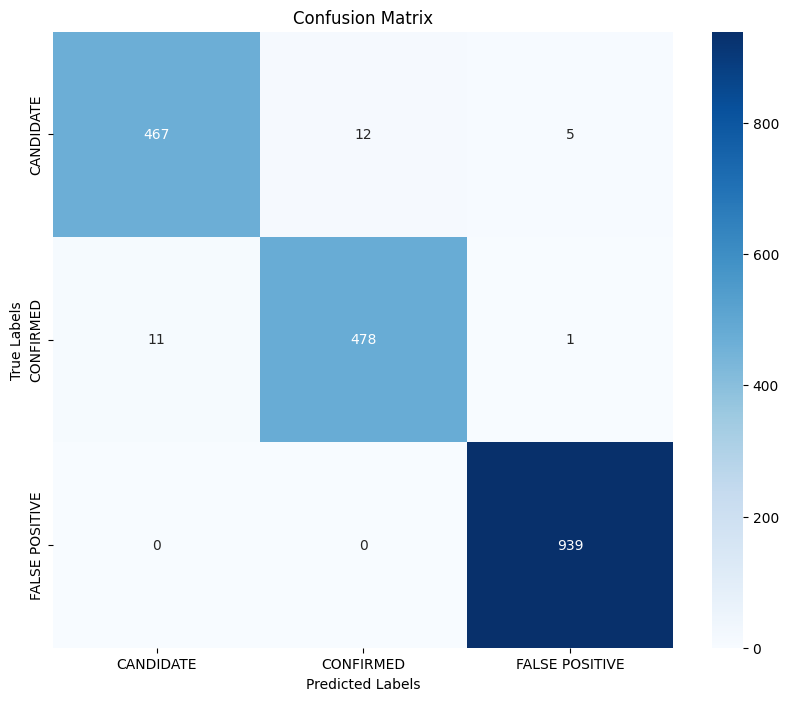

In [15]:
# predictions on the test set
y_pred = rf_classifier.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix_df = pd.DataFrame(conf_matrix,
                              index = label_encoder.classes_,
                              columns = label_encoder.classes_)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


###1. Why did you choose the particular algorithm?

It's an learning method based on decision trees. It's known for its robustness and effectiveness in handling high-dimensional data with complex relationships. It's less prone to overfitting compared to individual decision trees and can handle both classification and regression tasks efficiently.

### 2. What are the different tuning methods used for the algorithm?

Some of the key parameters to tune include the number of trees in the forest, the depth of the trees, the minimum number of samples required to split a node, and the minimum number of samples required at each leaf node.

### 3. Did you consider any other choice of algorithm? Why or why not?
  
 Considered **KNN** as a potential candidate algorithm, especially for its simplicity and ability to capture nonlinear relationships. However, its computational requirements and sensitivity to parameters could pose challenges, particularly with larger datasets or datasets with high dimensionality.

 Therefore, Random Forest, which generally offers robust performance and scalability, was also considered as an alternative. Ultimately, Random Forest was chosen in this case due to its ability to handle high-dimensional data efficiently and its robustness to overfitting.


### 4. What is the accuracy?

 Random Forest Accuracy : **0.98**



### 5. What are the different types of metrics that can be used to evaluate the model?

There are various metrics to evaluate the performance of a classification model:

- **Accuracy**: The proportion of correctly classified instances out of the total instances.
  
- **Precision**: The proportion of true positive predictions among all positive predictions.
  
- **Recall (Sensitivity)**: The proportion of true positive predictions among all actual positive instances.
  
- **F1 Score**: The harmonic mean of precision and recall, providing a balance between the two.
  
- **Confusion Matrix**: A table showing the counts of true positive, true negative, false positive, and false negative predictions.
  
- **ROC Curve and AUC**: Receiver Operating Characteristic curve and Area Under the Curve, useful for evaluating binary classifiers.
